#### Read Me: Este notebook versa sobre Regressão Linear

In [8]:
# importar as bibliotecas
import pandas as pd # funções para trabalhar com dados
from sklearn.model_selection import train_test_split # divisão de conjunto dados
from sklearn.linear_model import LinearRegression # regressão linear
import matplotlib.pyplot as plt # visualização de dados

In [9]:
file_path = 'Result_Vendas.csv' # identificação do arquivo de dados
df = pd.read_csv(file_path, encoding='ISO-8859-1') # leitura do arquivo de dados

In [20]:
df # dataframe, como se fosse tabela, dados estruturados

,CLIENTE_ID,NOME,IDADE,CIDADE,PRODUTO,CATEGORIA,VALOR,genero,genero_num
0,1,Maria Silva,34,São Paulo,Televisão,Eletrônicos,2500,Feminino,1.0
1,11,Patricia Menezes,40,Florianópolis,Televisão,Eletrônicos,2700,Feminino,1.0
2,2,João Santos,28,Rio de Janeiro,Notebook,Informática,3500,Masculino,0.0
3,10,Rafael Azevedo,33,Brasília,Notebook,Informática,3400,Masculino,0.0
4,3,Ana Pereira,45,Belo Horizonte,Smartphone,Eletrônicos,1500,Feminino,1.0
5,12,Gustavo Melo,27,Goiânia,Smartphone,Eletrônicos,1600,Masculino,0.0
6,4,Carlos Lima,38,Curitiba,Geladeira,Eletrodomésticos,2300,Masculino,0.0
7,13,Larissa Rocha,35,Vitória,Geladeira,Eletrodomésticos,2400,Feminino,1.0
8,5,Fernanda Costa,52,Porto Alegre,Fogão,Eletrodomésticos,1200,Feminino,1.0
9,14,Igor Oliveira,31,Belém,Fogão,Eletrodomésticos,1100,Masculino,0.0


In [11]:
df['genero'] = ['Feminino','Feminino','Masculino','Masculino',
                'Feminino', 'Masculino','Masculino','Feminino',
                'Feminino', 'Masculino','Masculino','Feminino',
                'Feminino','Masculino','Feminino']

In [19]:
# Transformacao_Dados: atribuir numeros para tipos de generos
df['genero_num'] = df['genero'].map({'Masculino': 0.0, 'Feminimo': 2.0}).fillna(1.0)

In [21]:
# Definir o que é input (X) e o que é saída (Y)
X = df[['IDADE', 'genero_num']] # nova tabela, com os dados de entrada (causa)
y = df['VALOR'] # nova tabela, com os dados de saída (consequencia)

In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15 entries, 0 to 14
Series name: VALOR
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 248.0 bytes


In [25]:
# Separação entre treino e teste - método supervisionado de AI (Machine Learning)
# Separar os dados entre grupo de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # separação dos dados

In [26]:
# Preparar a regressao linear
# X = variáveis de entrada ou causa
# y = variável de saída ou consequencia
# model = equação matemática
model = LinearRegression() # opção por Regressao Linear = será um tipo de equação matemática
model.fit(X_train, y_train) # preparação do método de Regressão Linear com o conjunto de treino

LinearRegression()

In [27]:
# Predizer ou executar o modelo de regressao
# y_pred = valor a ser predito, ou antevisto, baseado nos dados de entrada
y_pred = model.predict(X_test) # usar o conjunto de teste

In [29]:
y_test

,VALOR
9,1100
11,1750
0,2500


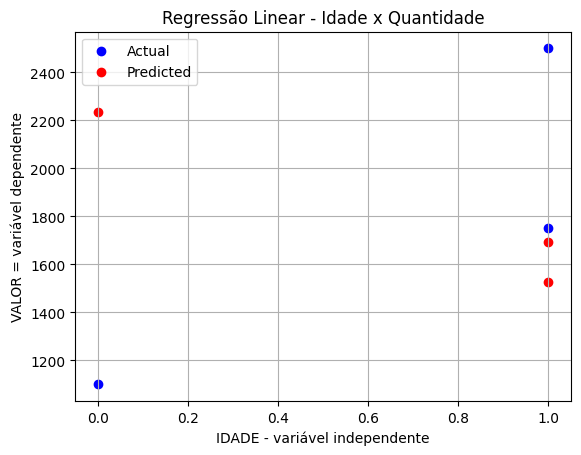

In [37]:
# Visualizar os resultados
plt.scatter(X_test['genero_num'], y_test, color='blue', label='Actual')
plt.scatter(X_test['genero_num'], y_pred, color='red', label='Predicted')
# plt.scatter(X_test['genero_num'], y_pred, color = 'green', label ='Actual_gen')
# plt.scatter(X_test['genero_num'], y_test, color = 'blue', label ='Predicted_gen')
plt.title('Regressão Linear - Idade x Quantidade') # titulo do grafico
plt.xlabel('IDADE - variável independente') # título do eixo x
plt.ylabel('VALOR = variável dependente') # título do eixo y
plt.legend() # incluir legenda
plt.grid(True)
plt.show() # para mostrar
